<h1>HW 4</h1>
Matt Buchovecky  
Astro 283

<h3>Reperform the fit and do a source subtraction again</h3>

In [19]:
import numpy
from astropy.io import fits 
from scipy import optimize
from matplotlib import pyplot 
%matplotlib inline 



In [3]:
star_fits = fits.open("./hw3prob1-data.fits")
star_data = star_fits[0].data
star_rav = star_data.ravel()


In [4]:
def symm_2d_gaussian(pos, F, xc, yc, sigma, B):
    return F*numpy.exp(-((pos[0]-xc)**2+(pos[1]-yc)**2)/(2*sigma**2)) + B
    

In [5]:
x_bins = star_data.shape[0]
y_bins = star_data.shape[1]

# Create x and y indices
x_arr = numpy.linspace(0, x_bins-1, x_bins)
y_arr = numpy.linspace(0, y_bins-1, y_bins)
x_arr, y_arr = numpy.meshgrid(x_arr, y_arr)
coords = x_arr, y_arr

x_rav = x_arr.ravel()
y_rav = y_arr.ravel()


In [6]:
init_guess = (50, 130, 130, 20, 100)
sigma_array = numpy.sqrt(star_data)
p_opt, p_cov = optimize.curve_fit(symm_2d_gaussian, (x_rav, y_rav), star_rav, init_guess, sigma_array.ravel())


(256, 256)


/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


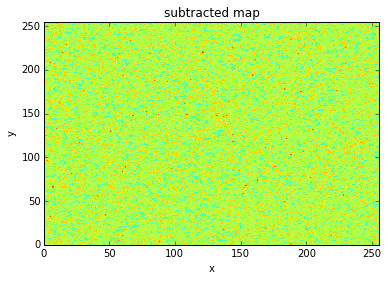

In [16]:
blank_sky = star_data - symm_2d_gaussian((x_arr,y_arr), *p_opt)
print(blank_sky.shape)
contour = pyplot.contourf(blank_sky)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title("subtracted map")
#cbar = pyplot.colorbar(label='DN')
#cbar.solids.set_edgecolors('face')


<h4>Chi squared test on subtraction</h4>

In [21]:
def chi_square_(function, x_vals, data_vals):
    return (data_vals - function(x_vals, *p_opt)**2/p_cov[0][0])


#part_func = partial(symm_2d_gaussian, pos)
#c_s = chi_square_(lambda(pos): symm_2d_gaussian(pos, *p_opt))
from functools import partial

In [8]:
k = 3.0 # gain 
star_data_pe = k * star_data
